# Analysis Report - Option 2
### Kaitlyn Perkovic | November 19, 2024
#### THe source and structure of the data used in the report is a combination of tidy data and graphs used to visualize the danceability and energy of two albums from Spotify, using Spotify data as well as class resources. The two albums that I chose are "May It Never Falter" and "a bit of a mad one" by glaive. I decided to use these albums since glaive is my favorite artist, and these are two of my favorite albums. The two audio features I decided to examine were danceability and energy. I believe that in order to have a higher danceability value, there must be a higher energy value. A high, up beat song may have a high danceability and energy value while a low, sad song may have the complete opposite.
###### Note: "May It Never Falter" is abbreviated to "MINF" and "a bit of a mad one" is abbreviated to "ABOAMO"

In [405]:
import urllib
import requests
import pandas as pd
import json
import base64
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
import numpy as np

^ All, if not most, imports learned from class that include tidy data, plots, and stats.

In [406]:
def get_session_token(SessionID, SessionKey):
    url = 'https://accounts.spotify.com/api/token'
    data = {'grant_type':'client_credentials'}
    encoded_key = base64.b64encode(str(SessionID + ":" + SessionKey).encode("ascii"))
    header = {'Authorization': 'Basic {}'.format(encoded_key.decode("ascii"))}
    response = requests.post(url, data = data, headers = header)
    print(response.status_code)
    return response.json()['access_token']

^ Defining the variable get_session_token to get the Spotify ID and key. url = Spotify endpoint. data = the credentials needed from Spotify. encoded_key = base64 encodes the Spotify ID and key. header = authentication. response = prints the response for url, data, header. print and return give the status code.


In [407]:
keys = pd.read_csv('keys.txt')
#keys

^ Defining "keys" to read the keys.txt file, "keys" calls for the file

In [408]:
access_token = get_session_token(keys['Client_ID'].iloc[0], keys['Client_Secret'].iloc[0])
#access_token

200


^ Defining access_token to get the session tokens of the 0th most element named Client_ID and the 0th most element named Client_Secret, "access_token" calls for the information

In [409]:
t_features_ep = 'https://api.spotify.com/v1/audio-features'
track_ep = 'https://api.spotify.com/v1/tracks'
ab_tracks_ep = 'https://api.spotify.com/v1/albums/{}/tracks'

^ Spotify endpoints for features, tracks, and albums {id}

In [410]:
def api_call(endpoint_url, api_header):
    response = requests.get(endpoint_url, headers = api_header)
    print(response.status_code)
    return response.json()

^ Defining api_call to get the endpoint url and sends a request to the url with the information from the headers. Prints and returns a status code.

In [411]:
session_header = {'Authorization': 'Bearer {}'.format(access_token)}

^ Authenticates session header and accesses the API's.

In [412]:
minf_album_id = '3tuFrjiGVuKMYiX7eY3s4P'
aboamo_album_id = '0SW2LQdzynFLJ05WzVYSJq'

^Defines the album id's for both albums from Spotify

In [413]:
ab_tracks_ep.format(minf_album_id),ab_tracks_ep.format(aboamo_album_id)

('https://api.spotify.com/v1/albums/3tuFrjiGVuKMYiX7eY3s4P/tracks',
 'https://api.spotify.com/v1/albums/0SW2LQdzynFLJ05WzVYSJq/tracks')

^Creates API links with album id's, seperated by commas.

In [414]:
minf_album_response = api_call(ab_tracks_ep.format(minf_album_id), session_header)
aboamo_album_response = api_call(ab_tracks_ep.format(aboamo_album_id), session_header)

200
200


^Calls the API's for the albums from Spotify and gives a response of a status code.

In [415]:
minf_album_df = pd.DataFrame(minf_album_response['items'])
aboamo_album_df = pd.DataFrame(aboamo_album_response['items'])

^Puts the items (information) from both albums into a tidy data (table) format.

In [416]:
#minf_album_df.head(11)

In [417]:
#aboamo_album_df.head(7)

^^ In tidy data format, shows the first 11 songs for MINF and first 7 songs from ABOAMO.

In [418]:
minf_track_ids = ','.join(minf_album_df['id'].to_list())
aboamo_track_ids = ','.join(aboamo_album_df['id'].to_list())

^ Takes the track id's from the albums and makes them a list seperated by commas.

In [419]:
#t_features_ep + '?ids={}'.format(minf_track_ids)

'https://api.spotify.com/v1/audio-features?ids=5JmjXrRYZyJYmXz72IstSS,2J7MImeZUG2bX3jWjAepHN,4u1cH1FUE3aJHxyTBVZdd4,2WfVvwTtB1ZHokdPwHnxom,0JGhX5ce08e27XLUmujk8o,2bV2IhaQ7eqek2EqGI6MPV,2LKcP5unuIpvghrGZY0A9B,3rLuup3EQbo8Tr6IBg0Dmc,2kd2ZeOY6grWJjtjAeveIc,1fXBUz1HrQ84gamMN8006V,5EnAgVo1hTYP6XimYWI2rn'

In [423]:
#t_features_ep + '?ids={}'.format(aboamo_track_ids)

^^ Calls the ID's of the tracks.

In [424]:
minf_track_features = api_call(t_features_ep + '?ids={}'.format(minf_track_ids), session_header)
aboamo_track_features = api_call(t_features_ep + '?ids={}'.format(aboamo_track_ids), session_header)

200
200


In [425]:
minf_track_info = api_call(track_ep + '?market=US&ids={}'.format(minf_track_ids), session_header)
aboamo_track_info = api_call(track_ep + '?market=US&ids={}'.format(aboamo_track_ids), session_header)

200
200


^^ Calls the API's from the track features and track information from the albums and responds with a response code.

In [426]:
minf_features_df = pd.DataFrame(minf_track_features['audio_features'])
aboamo_features_df = pd.DataFrame(aboamo_track_features['audio_features'])

^ Puts the audio features of the albums into a tidy data/table format

In [427]:
#minf_features_df.head(11)

In [428]:
#aboamo_features_df.head(7)

^ Shows the audio features for the first 11 tracks of MINF and first 7 tracks of ABOAMO.

In [429]:
minf_track_df = pd.DataFrame(minf_track_info['tracks'])
aboamo_track_df = pd.DataFrame(aboamo_track_info['tracks'])

^ Puts the track information into a tidy data/table format.

In [430]:
#minf_track_df.head(11)

In [431]:
#aboamo_track_df.head(7)

^^ Shows the track features for the first 11 tracks of MINF and the first 7 tracks of ABOAMO.

In [432]:
minf_merged = pd.merge(minf_features_df, minf_track_df, how = 'inner', on = 'id')

^ Merges MINF track features, track info.

In [433]:
#minf_merged.head(11)

^ Shows the first 11 merged track features and info in MINF

In [434]:
aboamo_merged = pd.merge(aboamo_features_df, aboamo_track_df, how = 'inner', on = 'id')

^ Merges ABOAMO track features, track info.

In [435]:
#aboamo_merged.head(7)

^ Shows the first 7 merged track features and info in ABOAMO

In [436]:
minf_merged['EP'] = "May It Never Falter"
aboamo_merged['EP'] = "a bit of a mad one"

^MINF merged EP is called May It Never Falter, ABOAMO merged EP is called a bit of a mad one

In [437]:
minf_merged.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type_x', 'id', 'uri_x', 'track_href', 'analysis_url', 'duration_ms_x',
       'time_signature', 'album', 'artists', 'disc_number', 'duration_ms_y',
       'explicit', 'external_ids', 'external_urls', 'href', 'is_local',
       'is_playable', 'name', 'popularity', 'preview_url', 'track_number',
       'type_y', 'uri_y', 'EP'],
      dtype='object')

^shows all columns in MINF merged

In [438]:
minf = minf_merged.drop(columns = ['key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type_x', 'id', 'uri_x', 'track_href', 'analysis_url', 'duration_ms_x',
       'time_signature', 'album', 'artists', 'disc_number', 'duration_ms_y',
       'explicit', 'external_ids', 'external_urls', 'href', 'is_local',
       'is_playable', 'popularity', 'preview_url', 'track_number',
       'type_y', 'uri_y'])

^drops selected columns in MINF merged

In [439]:
#minf

^ outputs what columns stayed

In [440]:
aboamo_merged.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type_x', 'id', 'uri_x', 'track_href', 'analysis_url', 'duration_ms_x',
       'time_signature', 'album', 'artists', 'disc_number', 'duration_ms_y',
       'explicit', 'external_ids', 'external_urls', 'href', 'is_local',
       'is_playable', 'name', 'popularity', 'preview_url', 'track_number',
       'type_y', 'uri_y', 'EP'],
      dtype='object')

In [441]:
aboamo = aboamo_merged.drop(columns = ['key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type_x', 'id', 'uri_x', 'track_href', 'analysis_url', 'duration_ms_x',
       'time_signature', 'album', 'artists', 'disc_number', 'duration_ms_y',
       'explicit', 'external_ids', 'external_urls', 'href', 'is_local',
       'is_playable', 'popularity', 'preview_url', 'track_number',
       'type_y', 'uri_y'])

In [442]:
#aboamo

^^^ shows merged columns from ABOAMO, drops selected columns, aboamo calls for what columns are left

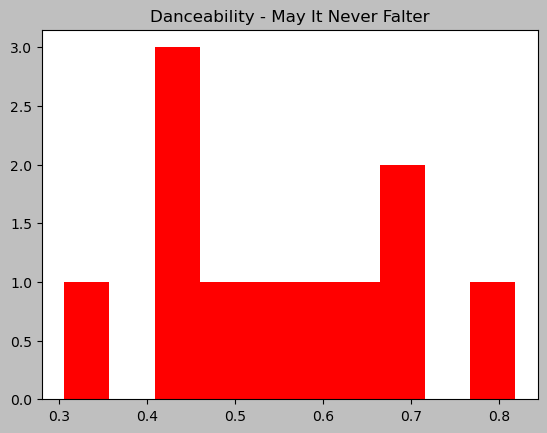

In [443]:
fig1, ax1 = plt.subplots()
ax1.hist(minf['danceability'], color = 'red')
ax1.set_title('Danceability - May It Never Falter')
plt.show()

^ Creates a histogram of the Danceability from MINF

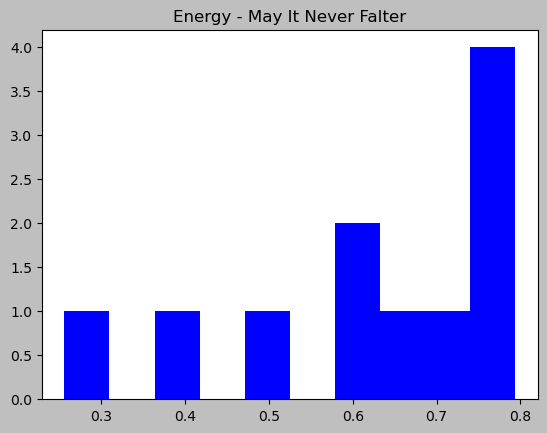

In [444]:
fig2, ax2 = plt.subplots()
ax2.hist(minf['energy'], color = 'blue')
ax2.set_title('Energy - May It Never Falter')
plt.show()

^ Creates a histogram of the Energy from MINF

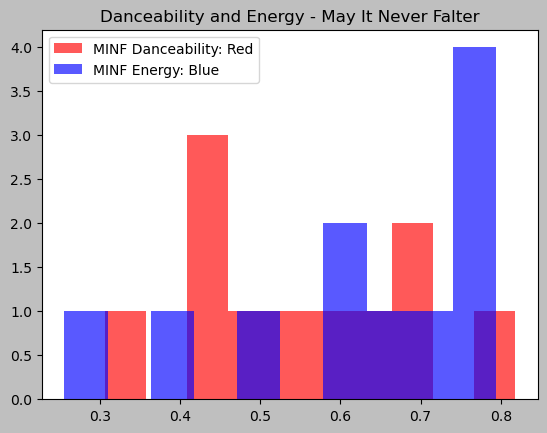

In [445]:
fig3, ax3 = plt.subplots()
ax3.hist(minf['danceability'], color = 'red', alpha = 0.65)
ax3.hist(minf['energy'], color = 'blue', alpha = 0.65)
ax3.set_title('Danceability and Energy - May It Never Falter')
ax3.legend(['MINF Danceability: Red', 'MINF Energy: Blue'])
plt.show()

^ Combines both danceability and energy from May It Never Falter

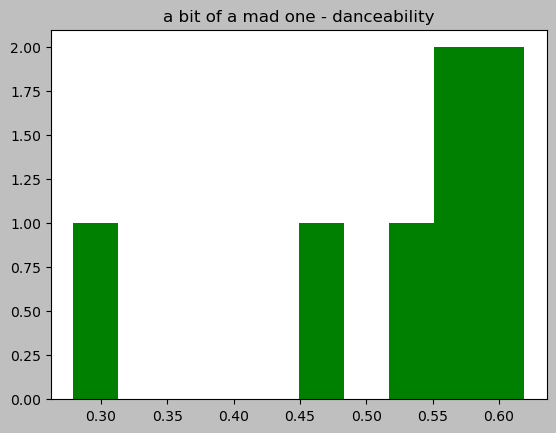

In [446]:
fig4, ax4 = plt.subplots()
ax4.hist(aboamo['danceability'], color = 'green')
ax4.set_title('a bit of a mad one - danceability')
plt.show()

^ Creates a histogram of the Danceability from ABOAMO

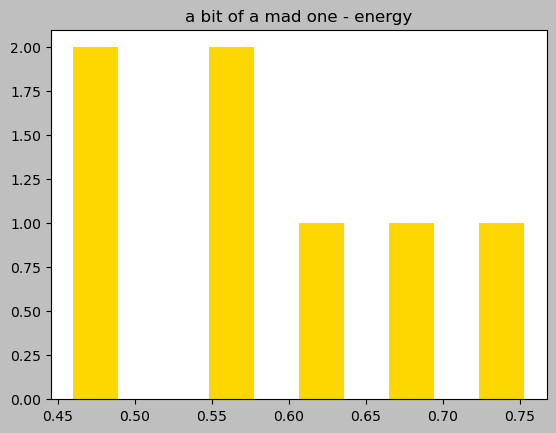

In [447]:
fig5, ax5 = plt.subplots()
ax5.hist(aboamo['energy'], color = 'gold')
ax5.set_title('a bit of a mad one - energy')
plt.show()

^ Creates a histogram of the Energy from ABOAMO

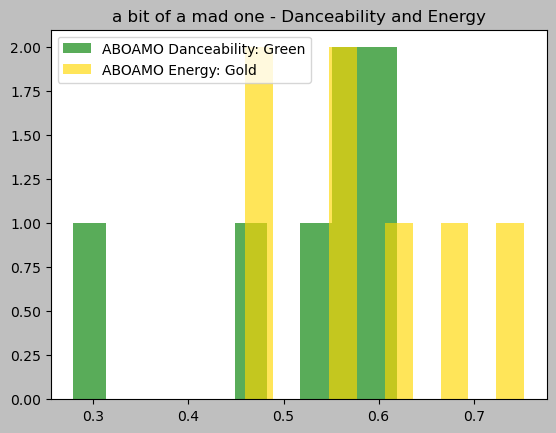

In [448]:
fig6, ax6 = plt.subplots()
ax6.hist(aboamo['danceability'], color = 'green', alpha = 0.65)
ax6.hist(aboamo['energy'], color = 'gold', alpha = 0.65)
ax6.set_title('a bit of a mad one - Danceability and Energy')
ax6.legend(['ABOAMO Danceability: Green', 'ABOAMO Energy: Gold'])
plt.show()

^Creates a histogram of danceability and energy from ABOAMO

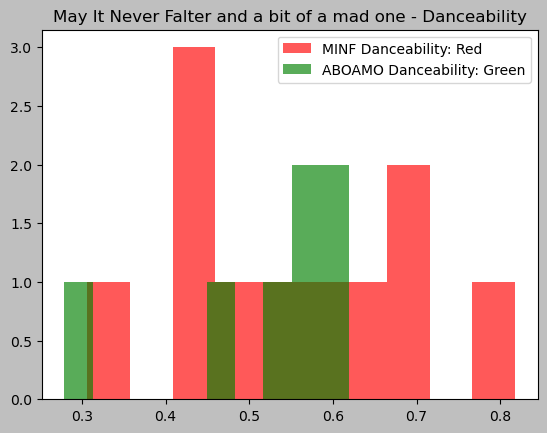

In [449]:
fig7, ax7 = plt.subplots()
ax7.hist(minf['danceability'], color = 'red', alpha = 0.65)
ax7.hist(aboamo['danceability'], color = 'green', alpha = 0.65)
ax7.set_title('May It Never Falter and a bit of a mad one - Danceability')
ax7.legend(['MINF Danceability: Red', 'ABOAMO Danceability: Green'])
plt.show()

^ Creates a histogram of the danceability from MINF and ABOAMO

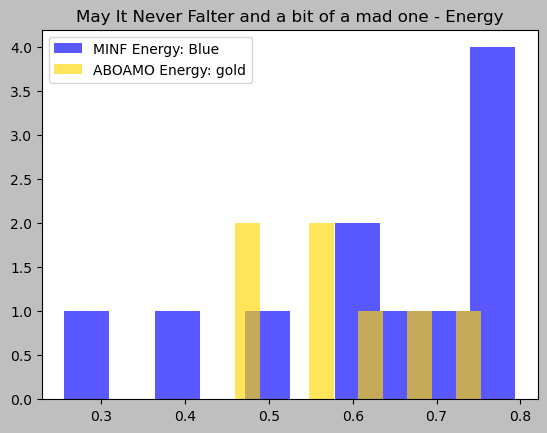

In [450]:
fig8, ax8 = plt.subplots()
ax8.hist(minf['energy'], color = 'blue', alpha = 0.65)
ax8.hist(aboamo['energy'], color = 'gold', alpha = 0.65)
ax8.set_title('May It Never Falter and a bit of a mad one - Energy')
ax8.legend(['MINF Energy: Blue', 'ABOAMO Energy: gold'])
plt.show()

^ Creates a histogram of the danceability from MINF and ABOAMO

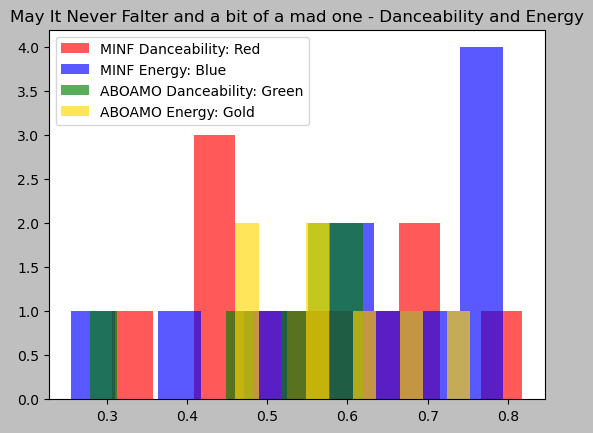

In [451]:
fig9, ax9 = plt.subplots()
ax9.hist(minf['danceability'], color = 'red', alpha = 0.65)
ax9.hist(minf['energy'], color = 'blue', alpha = 0.65)
ax9.hist(aboamo['danceability'], color = 'green', alpha = 0.65)
ax9.hist(aboamo['energy'], color = 'gold', alpha = 0.65)
ax9.set_title('May It Never Falter and a bit of a mad one - Danceability and Energy')
ax9.legend(['MINF Danceability: Red', 'MINF Energy: Blue', 'ABOAMO Danceability: Green', 'ABOAMO Energy: Gold'])
plt.show()

^Creates a histogram with danceability and energy from both albums.

From this histogram, I can conclude that MINF has the songs with the highest danceability, peaking at about 3.0 (red) and the highest energy, peaking at about 4.0 (blue). Most songs on both albums have a danceability and energy value at about 1.0

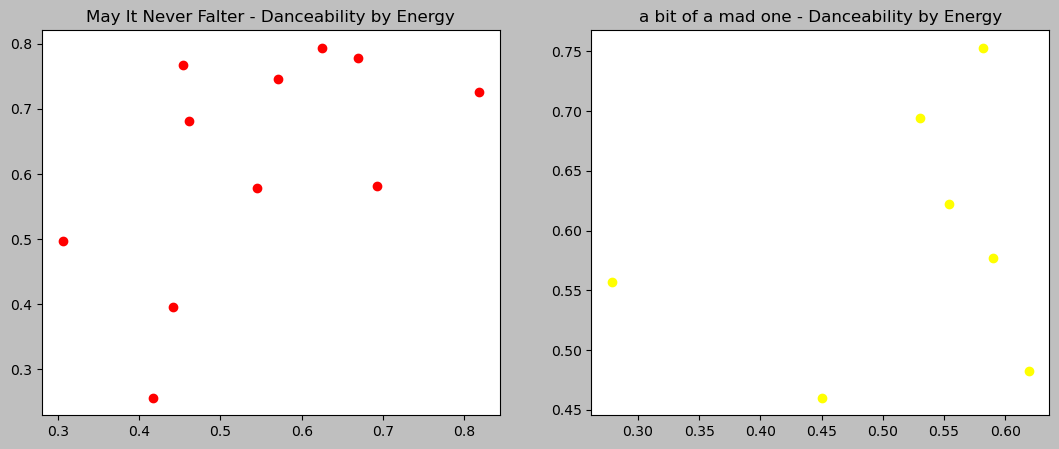

In [452]:
fig10, ax10 = plt.subplots(1,2, figsize = (13, 5))
ax10[0].scatter(minf['danceability'], minf['energy'], color = 'red')
ax10[1].scatter(aboamo['danceability'], aboamo['energy'], color = 'yellow')
ax10[0].set_title('May It Never Falter - Danceability by Energy')
ax10[1].set_title('a bit of a mad one - Danceability by Energy')
plt.show()

^ Creates a scatter plot with danceability (xaxis) by energy (yaxis) on seperate plots for both albums. figsize sets the plot size.

In [453]:
#minf[minf['EP'] == 'May It Never Falter']

In [454]:
#aboamo[aboamo['EP'] == 'a bit of a mad one']

^^ Identifies both MINF and ABOAMO as EPs and gives them a name and their danceability and energy values

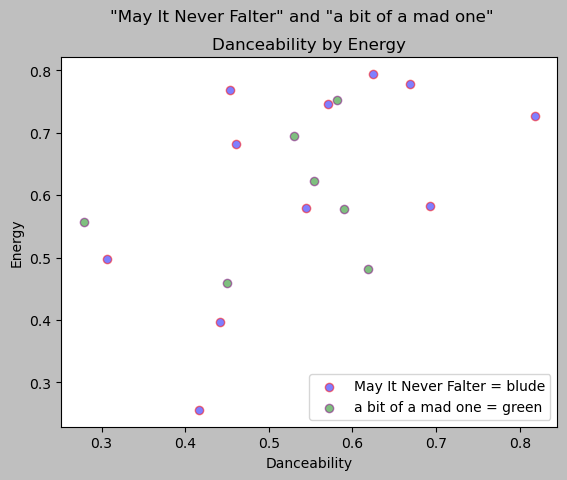

In [455]:
may = minf[minf['EP'] == 'May It Never Falter']
bit = aboamo[aboamo['EP'] == 'a bit of a mad one']

fig12, ax12 = plt.subplots()

may_scatter = ax12.scatter(may['danceability'], may['energy'], color = 'blue', label = 'a', edgecolors = 'red', alpha = 0.5)
bit_scatter = ax12.scatter(bit['danceability'], bit['energy'], color = 'green', label = 'b', edgecolors = 'purple', alpha = 0.5)

ax12.set_xlabel('Danceability')
ax12.set_ylabel('Energy')

ax12.set_title('Danceability by Energy')
fig12.suptitle('"May It Never Falter" and "a bit of a mad one"')

ax12.legend(['May It Never Falter = blude', 'a bit of a mad one = green'])

plt.style.use('grayscale')

plt.show()

^^ Creates a scatterplot for both albums and their danceability (xaxis) and energy (yaxis) with a key and outlines on the points. greyscale give the scatterplot a grey background.

** This next section's material was done by following the example linked in the Analysis Report Option 2 #7. **

In [456]:
result = stats.pearsonr(minf['danceability'], minf['energy'])
#result

^^ Defines the variable result and calls for the result of the statistic and pvalue of MINF danceability and energy

In [457]:
round(result.statistic, 2), round(result.pvalue, 3)

(0.54, 0.085)

^^ Rounds the values by 2 decimal places

In [458]:
result = stats.pearsonr(aboamo['danceability'], aboamo['energy'])
#result

In [459]:
round(result.statistic, 2), round(result.pvalue, 3)

(0.24, 0.609)

^^ Defines the variable result and calls for the result of the statistic and pvalue of ABOAMO danceability and energy and rounds the values.

In [460]:
minf.columns

Index(['danceability', 'energy', 'name', 'EP'], dtype='object')

In [461]:
aboamo.columns

Index(['danceability', 'energy', 'name', 'EP'], dtype='object')

^^ Calls for the items from both albums

In [462]:
np.random.uniform()

0.5472767543672635

^ I am unsure what this does.

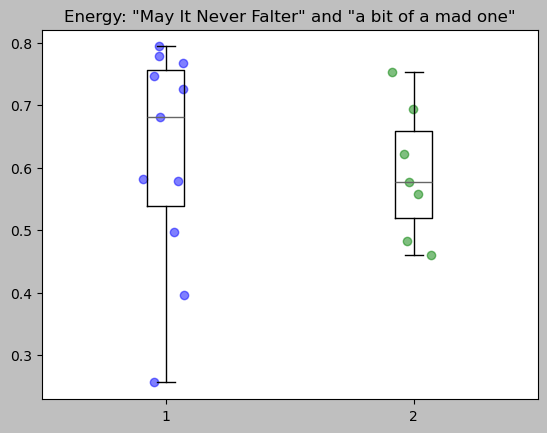

In [463]:
minf_energy = minf[minf['EP'] == 'May It Never Falter']['energy']
aboamo_energy = aboamo[aboamo['EP'] == 'a bit of a mad one']['energy']

minf_xs = [1] * len(minf_energy)
aboamo_xs = [2] * len(aboamo_energy)

minf_x_jitter = np.random.uniform(-0.10, 0.10, len(minf_xs))
aboamo_x_jitter = np.random.uniform(-0.10, 0.10, len(aboamo_xs))

fig13, ax13 = plt.subplots()

ax13.boxplot(minf_energy, positions = [1])
ax13.boxplot(aboamo_energy, positions = [2])

ax13.scatter(minf_xs + minf_x_jitter, minf_energy, alpha = 0.5, color = 'blue')
ax13.scatter(aboamo_xs + aboamo_x_jitter, aboamo_energy, alpha = 0.5, color = 'green')


ax13.set_title('Energy: "May It Never Falter" and "a bit of a mad one"')


plt.show()

^ I am not entirely sure what this block of code does. I know that this block of code is creating a boxplot representing the energy from both albums, with the first boxplot being MINF and the second boxplot being ABOAMO.

In [464]:
fit1 = smf.ols('danceability ~ energy', data = minf).fit()
fit1.summary()


/opt/anaconda3/envs/data_emat_fa24/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           danceability   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     3.731
Date:                Tue, 19 Nov 2024   Prob (F-statistic):             0.0855
Time:                        21:24:28   Log-Likelihood:                 7.8570
No. Observations:                  11   AIC:                            -11.71
Df Residuals:                       9   BIC:                            -10.92
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2641      0.151      1.749      0.114      -0.077       0.606
energy         0.4551      0.236      1.932      0.085      -0.078       0.988
==============================================================================
Omnibus:                        0.162   Durbin-Watson:                   1.773
Prob(Omnibus):                  0.922   Jarque-Bera (JB):                0.252
Skew:                           0.217   Prob(JB):                        0.882
Kurtosis:                       2.398   Cond. No.                         8.30
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

^ Calls for OLS of the danceability to energy in MINF 
y:danceability = Beta0: 0.2641 + Beta1: 0.4551(x1: energy) + E || danceability = 0.2641 + 0.4551(energy) + E

In [465]:
fit2 = smf.ols('danceability ~ energy', data = aboamo).fit()
fit2.summary()

/opt/anaconda3/envs/data_emat_fa24/lib/python3.12/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           danceability   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                 -0.133
Method:                 Least Squares   F-statistic:                    0.2967
Date:                Tue, 19 Nov 2024   Prob (F-statistic):              0.609
Time:                        21:24:28   Log-Likelihood:                 5.8081
No. Observations:                   7   AIC:                            -7.616
Df Residuals:                       5   BIC:                            -7.724
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3606      0.287      1.256      0.265      -0.377       1.099
energy         0.2604      0.478      0.545      0.609      -0.969       1.490
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.622
Prob(Omnibus):                    nan   Jarque-Bera (JB):                1.391
Skew:                          -1.069   Prob(JB):                        0.499
Kurtosis:                       3.447   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

^ Calls for OLS of the danceability to energy in ABOAMO
y:danceability = Beta0: 0.3606 + Beta1: 0.2604(x1: energy) + E || danceability = 0.3606 + 0.2604(energy) + E

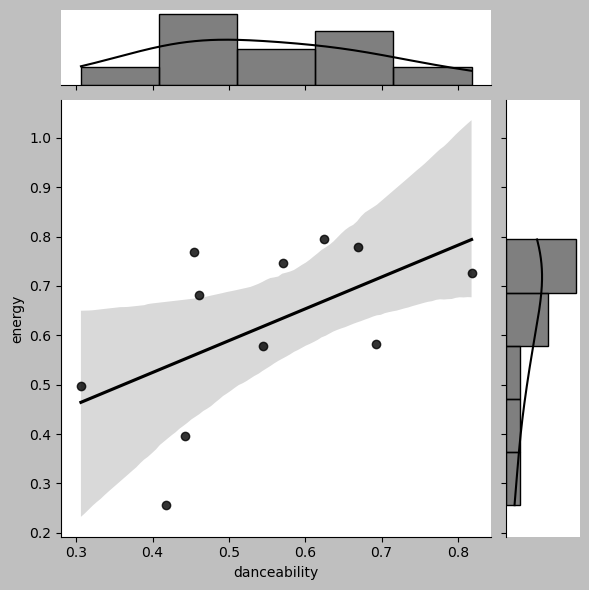

In [466]:
sns.jointplot(kind = 'reg', data = minf,
             x = 'danceability', y = 'energy')


plt.show()

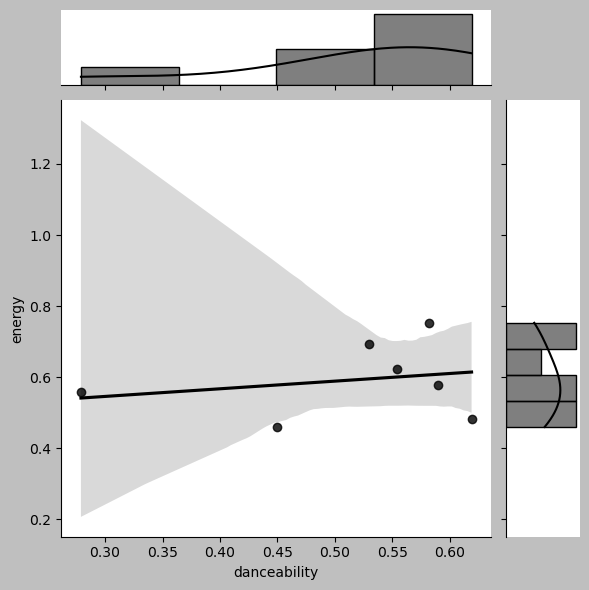

In [467]:
sns.jointplot(kind = 'reg', data = aboamo,
             x = 'danceability', y = 'energy')
plt.show()

^^ These plots show the regression of both MINF and ABOAMO of the danceability by energy from the first track to the last track.

##### Overall, I think that it was extremely interesting looking at the danceability and energy between two of my favorite albums- two of which have completely different feelings behind them.
###### Jointplots: These, I found most interesting. We can see that in MINF, it is a steady increase between the danceability and energy. While in ABOAMO, there is a slight gradual increase between danceability and energy.
###### Histograms: On the other hand, it was interesting seeing which album had the highest song for the audio features danceability and energy from a visual perspective rather than a value/number perspective.
###### A conclusion from this report is that MINF always had the tendancy to be on the higher side of danceability and energy. We can see this visually from the histograms.
###### Limitations: I think that a limitation for this report is bias. As someone who has listened to glaive for years, and listened to these albums on repeat, I did find myself questioning/having bias towards this data. For example, when I saw that MINF had a track with higher danceability/energy, I started to experience some bias towards the data, predicting and thinking that ABOAMO would have a track with the highest danceability/energy value.
###### Next Steps: A next step that I would want to take, as well as other alternatives, is to more specifically examine a each song on one album and either compare amongst the other songs or compare the songs from one album to the other.